# Background and Objectives of the Analysis
Pemilik Supermarket, yang juga merupakan teman lama saya, meminta bantuan untuk memahami kondisi bisnis supermarketnya saat ini. Ia ingin mengetahui apakah performanya sudah optimal atau masih terdapat area yang perlu diperhatikan dan ditingkatkan. Upaya ini dilakukan agar ia dan tim dapat menerapkan strategi yang tepat, menyediakan fasilitas serta pelayanan yang lebih baik bagi pelanggan, meningkatkan kenyamanan saat berbelanja, sekaligus mendorong peningkatan penjualan supermarket. Yang Ingin diketahui oleh Pemilik Supermarket saat ini adalah:
- Karakteristik Pelanggan yang berbelanja di Supermarket, termasuk latar belakang dan segmentasi pelanggan yang perlu mendapatkan perhatian khusus.
- pemilik ingin tahu apakah pelanggan yang pernah komplain merupakan pelanggan loyal yang sering berbelanja.
- Evaluasi efektivitas campaign yang telah dijalankan dalam meningkatkan penjualan..
- Produk apa saja yang paling banyak dibeli oleh pelanggan.
- Evaluasi efektivitas strategi diskon yang selama ini diterapkan.
- Marketplace mana yang paling diminati dan paling banyak digunakan oleh pelanggan.
- Seberapa menarik website supermarket dalam mendorong pembelian, melalui performa conversion rate.

# Data
Pemilik Supermarket sudah memberikan datanya kepada saya untuk dianalisis apakah ada kekurangan yang perlu Ia perbaiki dan apa yang sudah baik dan masih bisa ditingkatkan lagi. Pemilik Supermarket memberitahu saya bahwa Datasetnya dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK). 

# Data Understanding
Saya sudah menerima data dari Pemilik Superstore tersebut. Sebelum saya melakukan **Data Analisis**, saya akan melihat dan membaca data yang telah telah saya terima untuk mengetahui domain knowledge dari Supermarket tersebut. Dengan telah mengerti Domain Knowledge, dapat membantu saya untuk menentukan bagaimana, dengan cara seperti apa dan arah analisis yang akan saya lakukan dengan harapan dapat membantu pemilik menjelaskan kondisi supermarket saat ini dan memberikan saran strategi yang cocok agar dapat meningkatkan transaksi dari pelanggannya di Supermarket.

### Tools Required

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import geopandas as gpd

## Data Reading Process

In [3]:
# Import data csv klien
df = pd.read_csv('supermarket_customers.csv', sep='\t') 

In [4]:
# tampilkan data 5 baris paling atas dan 5 baris paling bawah
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [5]:
# Karena ada keterbatasan dalam menampilkan keseluruhan kolom, maka saya menampilkan seluruh judul kolom yang ada untuk membantu saya mendapatkan gambaran singkat data
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
# Menampilkan data apa saja yang terdapat di masing-masing kolom
pd.set_option('display.max_colwidth', None)

# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(
    columns=['Column Name',
             'Number of Unique',
             'Unique Sample'],
             data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

In [7]:
# Menampilkan jenis data dan jumlah isi data dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [10]:
# Menampilkan rentang Tahun Lahir dari seluruh Customer Supermarket 
(df['Year_Birth'].min(),df['Year_Birth'].max())

(np.int64(1893), np.int64(1996))

In [11]:
# Menampilkan baris yang kolom Income tidak ada datanya
df[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [12]:
# Menampilkan proporsi baris yang kolom Income tidak ada datanya
len(df[df['Income'].isnull()])/len(df)*100

1.0714285714285714

In [13]:
# Menampilkan jumlah baris yang kolom Income tidak ada datanya dikelompokkan berdasarkan Marital_status
df[df['Income'].isnull()].groupby(['Education','Marital_Status']).size()

Education   Marital_Status
2n Cycle    Married           1
            Single            1
            Together          1
Graduation  Married           4
            Single            6
            Together          1
Master      Together          4
            Widow             1
PhD         Married           2
            Single            2
            Together          1
dtype: int64

In [14]:
# Menampilkan jumlah baris yang kolom Income tidak ada datanya dikelompokkan berdasarkan Marital_status
df[df['Income'].isnull()].groupby(['Marital_Status']).size()

Marital_Status
Married     7
Single      9
Together    7
Widow       1
dtype: int64

In [15]:
# Menampilkan jumlah baris yang kolom Income tidak ada datanya dikelompokkan berdasarkan Education
df[df['Income'].isnull()].groupby(['Education']).size()

Education
2n Cycle       3
Graduation    11
Master         5
PhD            5
dtype: int64

In [16]:
# Menampilkan data describe dari setiap Product yang dijual oleh Supermarket

df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']].describe()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [17]:
# Menampilkan baris data berdasarkan kolom 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth'
df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,3,8,10,4,7
1,2,1,1,2,5
2,1,8,2,10,4
3,2,2,0,4,6
4,5,5,3,6,5
...,...,...,...,...,...
2235,2,9,3,4,5
2236,7,8,2,5,7
2237,1,2,3,13,6
2238,2,6,5,10,3


In [18]:
df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth']].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,2.325000,4.084821,2.662054,5.790179,5.316518
std,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000


# Data Overview
### 📊 Penjelasan yang saya dapatkan dari membaca Data dan bertanya ke Pemilik Supermarket sebagai berikut.
Banyaknya pelanggan yang berkunjung ke Supermarket adalah 2240 pelanggan (tidak ada data yang terduplikat). Detail dijelaskan kolom-kolom yang berjumlah 29 kolom (baris=2240, kolom=29).

### 👤 Data Pribadi Pelanggan:
- 🆔**ID**: Nomor Identitas pelanggan di Supermarket (sebanyak 2240 data)
- 🎂**Year_Birth**: Tahun lahir pelanggan (range dari tahun 1893 sampai dengan tahun 1996)
- 🎓**Education**: Tingkat pendidikan pelanggan dari (2n Cycle (Diploma), Graduation, PhD, Master, Basic (SD-SMA))
- 💍**Marital_Status**: Status pernikahan pelanggan (Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO)
- 💰**Income**: Pendapatan pelanggan per tahun (terdapat 24 data kosong (sebanyak 1%) dari
2240; range pendapatan: 1730 s.d 666666 dengan rata-rata: 52247.251354). Data kosong berdasarkan Education:
  - 2n Cycle       3 orang
  - Graduation    11 orang
  - Master         5 orang
  - PhD            5 orang
- 🧒**Kidhome**: Jumlah anak kecil di rumah pelanggan (dari 0 s.d 2 anak)
- 🧑‍🦱**Teenhome**: Jumlah remaja di rumah pelanggan (dari 0 s.d 2 anak)


### 🗓️ Lamanya Pelanggan sudah menjadi pelanggan di Supermarket
- 🗓️**Dt_Customer**: Tanggal pelanggan mulai terdaftar di perusahaan
- ⏳**Recency**: Jumlah hari sejak terakhir kali pelanggan melakukan pembelian (0 s.d 99 hari)

### 🛒Total Pembelian dari masing-masing produk yang dijual di Supermarket (Selama 2 tahun terakhir)
 - 🍷**MntWines**: Total pengeluaran untuk wine  (range: 0 s.d 1493)
 - 🍎**MntFruits**: Total pengeluaran untuk buah (range: 0 s.d 199)
 - 🍖**MntMeatProducts**: Total pengeluaran untuk daging (range: 0 s.d 1725)
 - 🐟**MntFishProducts**: Total pengeluaran untuk ikan (range: 0 s.d 259)
 - 🍬**MntSweetProducts**: Total pengeluaran untuk makanan manis (range: 0 s.d 263)
 - 💎**MntGoldProds**: Total pengeluaran untuk produk emas dalam (range: 0 s.d 362)

### 🧠 Perilaku Pelanggan 
- 🏷️**NumDealsPurchases**: Jumlah pembelian yang dilakukan dengan diskon (range 0 s.d 15 kali)
- 📢**AcceptedCmp1**: 1. pelanggan menerima penawaran pada promosi pertama, 0. tidak
- 📢**AcceptedCmp2**: 1. pelanggan menerima penawaran pada promosi kedua, 0. tidak
- 📢**AcceptedCmp3**: 1. pelanggan menerima penawaran pada promosi ketiga, 0. tidak
- 📢**AcceptedCmp4**: 1. pelanggan menerima penawaran pada promosi keempat, 0. tidak
- 📢**AcceptedCmp5**: 1. pelanggan menerima penawaran pada promosi kelima, 0. tidak
- 📢**Response**: 1. pelanggan menerima penawaran pada promosi terakhir, 0. tidak
- 🌐**NumWebPurchases**: Jumlah pembelian melalui website perusahaan (range 0 s.d 27 kali)
- 📚**NumCatalogPurchases**: Jumlah pembelian melalui katalog (range 0 s.d 28 kali)
- 🛍️**NumStorePurchases**: Jumlah pembelian di toko (range 0 s.d 13 kali)
- 👀**NumWebVisitsMonth**: Jumlah kunjungan ke website perusahaan dalam sebulan terakhir (range 0 s.d 20 kali)
- 😡**Complain**: 1. pelanggan pernah mengajukan keluhan dalam 2 tahun terakhir, 0. tidak

### 📈 Lainnya
- 🔵**Z_CostContact**: Biaya pengiriman penawaran promosi ke pelanggan
- 🟢**Z_Revenue**: Total Pendapatan Supermarket
- **angka yang ditampilkan disini adalah angka standar score dari Supermarket karena merupakan data confidential**

# Data Manipulation, Cleansing dan Data Preparation

### Copy Data
Mengcopy data supaya data asli tetap terjaga. Yang digunakan dalam Data Manipulation, Cleansing dan Preparation adalah Data kedua hasil copy data utama.

In [19]:
# Mengcopy data supaya data asli tetap terjaga
df_3 = df.copy()

### Adjusting Columns Order
Saya melakukan perubahan urutan kolom untuk kenyamanan saya dalam melanjutkan Proses selanjutnya

In [20]:
# Mengubah urrutan kolom
df_3 = df_3[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
             'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
             'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
             'AcceptedCmp5', 'Response','Complain', 'Z_CostContact', 'Z_Revenue']]
print('nama-nama kolom', df_3.columns)

nama-nama kolom Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue'],
      dtype='object')


### Renaming Columns
Saya melakukan perubahan urutan kolom untuk kenyamanan saya dalam melanjutkan Proses selanjutnya

In [21]:
# Rename kolom 'Response' menjadi 'AcceptedCmp6'
df_3 = df_3.rename(columns={
    'Response':'AcceptedCmp6'})
df_3

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Z_CostContact,Z_Revenue
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,1,0,3,11
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,0,3,11
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,0,3,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,0,3,11
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,0,3,11
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,1,0,0,0,0,0,0,3,11
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,0,0,1,0,0,0,3,11
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,0,3,11


### Deleting Columns
Saya melakukan delete kolom **Z_CostContact, Z_Revenue** karena nilainya sama semua setiap barisnya sehingga menurut saya tidak memberikan saya informasi yang signifikan.

In [22]:
# Delete kolom 'Z_CostContact', 'Z_Revenue'
df_3= df_3.drop(columns=['Z_CostContact', 'Z_Revenue'])

### Convert Column Data Type

In [23]:
# Mengubah tipe data dari kolom 'Year_Birth' - int64 menjadi Date time

df_3['Year_Birth'] = pd.to_datetime(df_3['Year_Birth'], format='%Y')

In [24]:
# Untuk mengetahui bentuk format tanggal dari 'Dt_Customer'
df_3['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [25]:
# Mengubah tipe data dari kolom 'Dt_Customer' - object menjadi Date time

df_3['Dt_Customer'] = pd.to_datetime(df_3['Dt_Customer'], format='%d-%m-%Y')


### Adding New Columns
Saya menambahkan kolom yang akan saya butuhkan dalam proses analisis

In [26]:
# Menambah kolom hasil ekstrak tahun nya saja dari kolom 'Dt_Customer'
df_3['Dt_Customer_Year'] = df_3['Dt_Customer'].dt.year
print('Kolom DT_Customer_Year telah ditambahkan')

Kolom DT_Customer_Year telah ditambahkan


In [27]:
# sebelum menambah Kolom Umur Pelanggan, saya ingin melihat tahun paling terakhir Customer mulai terdaftar di Perusahaan
df_3['Dt_Customer_Year'].max(),df_3['Dt_Customer_Year'].min()
print(f'Tahun terakhir Pelanggan terdaftar sebagai Pelanggan di Perusahaan adalah tahun {df_3['Dt_Customer_Year'].max()} dan Tahun paling awal Pelanggan terdaftar sebagai Pelanggan di Perusahaan adalah tahun {df_3['Dt_Customer_Year'].min()}')

Tahun terakhir Pelanggan terdaftar sebagai Pelanggan di Perusahaan adalah tahun 2014 dan Tahun paling awal Pelanggan terdaftar sebagai Pelanggan di Perusahaan adalah tahun 2012


In [28]:
# Jumlah hari maksimum dan minimum sejak terakhir kali pelanggan melakukan pembelian

(df_3['Recency'].max(),df_3['Recency'].min())
print(f'Jumlah hari maksimum adalah {df_3['Recency'].max()} dan Jumlah hari minimum adalah {df_3['Recency'].min()} sejak terakhir kali pelanggan melakukan pembelian')

Jumlah hari maksimum adalah 99 dan Jumlah hari minimum adalah 0 sejak terakhir kali pelanggan melakukan pembelian


In [29]:
# Menampilkan data dengan jumlah recency maksimum dengan hanya menampilkan kolom 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income'
df_3.loc[df_3['Recency'] == 99, ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income']]

,ID,Year_Birth,Education,Marital_Status,Income
38,8595,1973-01-01,Graduation,Widow,42429.0
192,7829,1900-01-01,2n Cycle,Divorced,36640.0
208,868,1966-01-01,Graduation,Married,44794.0
444,2106,1974-01-01,2n Cycle,Married,20130.0
491,22,1976-01-01,Graduation,Divorced,46310.0
606,7232,1973-01-01,Graduation,Widow,42429.0
685,10142,1976-01-01,PhD,Divorced,66476.0
700,9977,1973-01-01,Graduation,Divorced,78901.0
725,7212,1966-01-01,Graduation,Married,44794.0
1033,5263,1977-01-01,2n Cycle,Married,31056.0


Karena Berdasarkan data yang kami dapat adalah angka berdasarkan 2 tahun terakhir dan hari Recency maksimalnya adalah 99 hari (jumlah hari tidak lebih dari 2 tahun) maka kesimpulan saya adalah data ini adalah data 2016.
Angka ini didapat dari tahun terakhir kali pelanggan mendaftarkan dirinya di Perusahaan yaitu **2014** ditambah berdasarkan Detail yang diberikan Owner angka yang tersaji adalah data dalam **2 tahun terakhir**.
Angka Tahun **2016** ini akan sangat membantu kami ke step data manipulation dan data analisis berikutnya.

In [30]:
# Menambah kolom dan menghitung Umur Pelanggan
df_3['Umur_Pelanggan'] = 2016 - df_3['Year_Birth'].dt.year
print('Kolom Umur_Pelanggan telah ditambahkan')

Kolom Umur_Pelanggan telah ditambahkan


In [31]:
# Menambah kolom dan menghitung berapa lama telah menjadi Pelanggan Supermarket
df_3['lama_jd_Pelanggan'] = 2016 - df_3['Dt_Customer'].dt.year
print('Kolom lama_jd_Pelanggan telah ditambahkan')

Kolom lama_jd_Pelanggan telah ditambahkan


In [32]:
# Menambah kolom dan menghitung Total banyak anak dari setiap Pelanggan Supermarket
df_3['Children'] = df_3[['Kidhome','Teenhome']].sum(axis=1)
print('Kolom Children telah ditambahkan')

Kolom Children telah ditambahkan


In [33]:
# Menambah kolom dan menghitung Total Spending pelanggan di Supermarket
df_3['Total_Spending'] = df_3[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)
print('Kolom Total Spending telah ditambahkan')

Kolom Total Spending telah ditambahkan


In [34]:
# Menambah kolom dan menghitung Total Transaksi yang dilakukan pelanggan di Supermarket
df_3['times_transaction'] = df_3[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
print('Kolom Times Transaction telah ditambahkan')

Kolom Times Transaction telah ditambahkan


In [35]:
# Menambah kolom 'TotalAcceptedCmp' untuk mengetahui apakah ada customer yang menerima broadcast lebih dari 1 kali
df_3['TotalAcceptedCmp'] = df_3[['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp6']].sum(axis=1)
print('Kolom TotalAcceptedCmp telah ditambahkan')

Kolom TotalAcceptedCmp telah ditambahkan


In [36]:
# Menambah kolom 'People' untuk mengetahui 1 keluarga memiliki total berapa orang
def count_people(row):
    status = row['Marital_Status']
    children = row['Children']
    
    single = ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
    couple = ['Together', 'Married']
    
    if status in single:
        return 1 + children
    elif status in couple:
        return 2 + children
    else:
        return 0 

# Tambahkan kolom People
df_3['People'] = df_3.apply(count_people, axis=1)

print('Kolom People telah ditambahkan')

Kolom People telah ditambahkan


In [37]:
# Mengecek kolom
df_3.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp6', 'Complain', 'Dt_Customer_Year',
       'Umur_Pelanggan', 'lama_jd_Pelanggan', 'Children', 'Total_Spending',
       'times_transaction', 'TotalAcceptedCmp', 'People'],
      dtype='object')

In [38]:
#Merapikan Urutan Kolom
df_3 = df_3[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome','Teenhome', 'Children', 'People', 'Dt_Customer','Dt_Customer_Year',
             'Umur_Pelanggan','lama_jd_Pelanggan', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
             'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'Total_Spending', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'times_transaction', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2',
             'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp6', 'TotalAcceptedCmp','Complain']]

In [39]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Children             2240 non-null   int64         
 8   People               2240 non-null   int64         
 9   Dt_Customer          2240 non-null   datetime64[ns]
 10  Dt_Customer_Year     2240 non-null   int32         
 11  Umur_Pelanggan       2240 non-null   int32         
 12  lama_jd_Pelanggan    2240 non-null   int32         
 13  Recency              2240 non-nul

Dari Data awal yang semula memiliki **29 kolom**, telah dihapus **2 kolom ('Z_CostContact', 'Z_Revenue')** dan telah ditambah **8 kolom baru ('Children', 'People', 'Dt_Customer_Year', 'Umur_Pelanggan', 'lama_jd_Pelanggan', 'Total_Spending', 'times_transaction', 'TotalAcceptedCmp')**. Data setelah dilakukan penghapusan dan penambahan kolom baru menjadi data dengan total kolom sebanyak **35 kolom**

### Data Inputation
Input Data Income yang kosong

In [40]:
df_3[df_3['Income'].isnull()].groupby(['Marital_Status']).size()

Marital_Status
Married     7
Single      9
Together    7
Widow       1
dtype: int64

In [41]:
df_3['Income'].groupby(df_3['Marital_Status']).describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Absurd,2.0,72365.500000,9727.667989,65487.0,68926.25,72365.5,75804.75,79244.0
Alone,3.0,43789.000000,15215.133486,34176.0,35018.00,35860.0,48595.50,61331.0
Divorced,232.0,52834.228448,21239.759765,1730.0,36948.00,52683.0,68758.50,153924.0
Married,857.0,51724.978996,21449.406404,2447.0,35441.00,51876.0,67546.00,160803.0
Single,471.0,50995.350318,22229.542143,3502.0,33558.00,48904.0,68959.00,113734.0
Together,573.0,53245.534031,33644.100584,5648.0,34916.00,51369.0,68682.00,666666.0
Widow,76.0,56481.552632,16837.952451,22123.0,44892.25,56551.0,70321.75,85620.0
YOLO,2.0,48432.000000,0.000000,48432.0,48432.00,48432.0,48432.00,48432.0


In [42]:
df_3[df_3['Income'].isnull()].groupby(['Education']).size()

Education
2n Cycle       3
Graduation    11
Master         5
PhD            5
dtype: int64

In [43]:
df_3['Income'].groupby(df_3['Education']).describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,200.0,47633.190000,22119.081838,7500.0,27526.50,46805.0,65393.25,96547.0
Basic,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.0,24882.00,34445.0
Graduation,1116.0,52720.373656,28177.192681,1730.0,34834.50,52028.5,69930.50,666666.0
Master,365.0,52917.534247,20157.788029,6560.0,37760.00,50943.0,66726.00,157733.0
PhD,481.0,56145.313929,20612.979997,4023.0,40451.00,55212.0,69098.00,162397.0


Setelah dilakukannya analisis lebih jauh terlihat bahwa data kolom income yang kosong didominasi oleh orang-orang dengan gelar **Graduation** sebanyak 11 orang. Dengan melihat data ini maka saya akan mengisi data kolom Income yang kosong dengan nilai **Median** dari setiap gelar dengan tujuan:
- Mengisi data **Income** berdasarkan **Education** karena **Education** mempengaruhi pekerjaan seseorang yang juga akan mempengaruhi **Income** seseorang
- dengan dilakukannya input sesuai dengan masing-masing gelar **Education**, maka data akan lebih realistis dengan keadaan yang sebenarnya.
- menggunakan angka **median** karena angka **median** lebih stabil terhadap angka yang outlier.

In [44]:
# Isi nilai Income yang kosong menggunakan median sesuai kelompok Education masing-masing

Isian_data = df_3.groupby('Education')['Income'].median()

df_3['Income'] = df_3.apply(
    lambda x : Isian_data[x['Education']] if pd.isnull(x['Income']) else x['Income'],
    axis=1
)

In [45]:
#Mengecek apakah data di kolom 'Income' sudah terisi semua atau belum
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Children             2240 non-null   int64         
 8   People               2240 non-null   int64         
 9   Dt_Customer          2240 non-null   datetime64[ns]
 10  Dt_Customer_Year     2240 non-null   int32         
 11  Umur_Pelanggan       2240 non-null   int32         
 12  lama_jd_Pelanggan    2240 non-null   int32         
 13  Recency              2240 non-nul

Data kolom Income dari hanya ada 2216 data, setelah diisi jumlah datanya sudah sesuai dengan jumlah pelanggan yaitu 2240

### Replacing Data
Setelah Isi kolom income sudah terisi semua, selanjutnya mengganti data kolom Income per tahun menjadi per 2 tahun

In [46]:
# Replace nilai Income (per tahun) menjadi income untuk 2 tahun

df_3['Income'] = df_3['Income'] * 2


# Cleaned Data

Data sudah bersih, bebas dari data kosong dan siap untuk dianalisa lebih lanjut untuk dapat menjawab pertanyaan sesuai dengan yang ingin dicari oleh Pemilik Supermarket


In [48]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Menyimpan Data yang sudah bersih
df_3.to_csv("Data Bersih Supermarket Siap Dianalisa lebih lanjut2.csv", index=False)
df_3.to_excel("Data Bersih Supermarket Siap Dianalisa lebih lanjut2.xlsx", index=False)

In [48]:
# Melihat sedikit Preview dari Data yang sudah dibersihkan
listItem = []
for col in df_3.columns :
    listItem.append([col, df_3[col].dtype, df_3[col].isna().sum(),
                    df_3[col].nunique(), list(df_3[col].drop_duplicates().sample(2).values)]);

df_3Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_3.shape)
df_3Desc

(2240, 35)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,"[9938, 7366]"
1,Year_Birth,datetime64[ns],0,59,"[1967-01-01T00:00:00.000000000, 1984-01-01T00:00:00.000000000]"
2,Education,object,0,5,"[PhD, 2n Cycle]"
3,Marital_Status,object,0,8,"[Absurd, Single]"
4,Income,float64,0,1976,"[56880.0, 145270.0]"
5,Kidhome,int64,0,3,"[1, 0]"
6,Teenhome,int64,0,3,"[1, 2]"
7,Children,int64,0,4,"[1, 2]"
8,People,int64,0,5,"[3, 4]"
9,Dt_Customer,datetime64[ns],0,663,"[2013-03-18T00:00:00.000000000, 2013-07-04T00:00:00.000000000]"


# Data Analysis and Deep Understanding of Data

## 1. Understanding Our Customer

### a. Number of Customers by Education Level

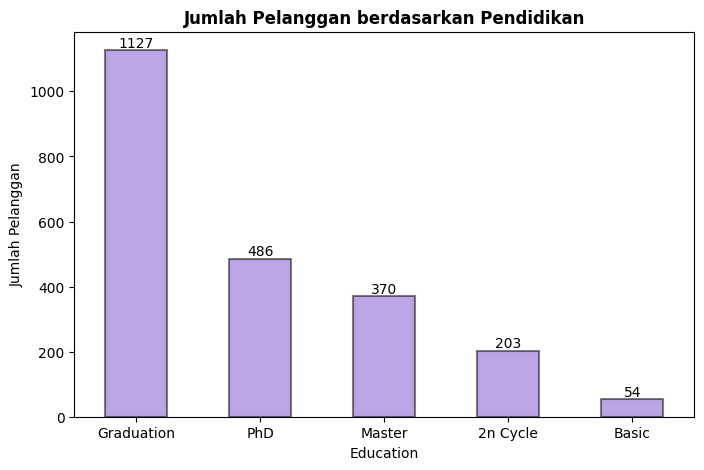

In [49]:
# Jumlah Customer Berdasarkan Education

plt.figure(figsize=(8,5))

bars = df_3['Education'].value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                          color="#7C4BCAD2",
                                                                          edgecolor='black',
                                                                          linewidth=1.5,
                                                                          alpha=0.5)
plt.title('Jumlah Pelanggan berdasarkan Pendidikan', fontweight='bold')
for bar in bars.patches:
    height = bar.get_height()  # tinggi bar
    bars.text(
        bar.get_x() + bar.get_width()/2,  # posisi x = tengah bar
        height,                            # posisi y = sedikit di atas bar
        f'{int(height)}',                   # teks = nilai bar
        ha='center', va='bottom',          # align horizontal & vertical
        fontsize=10)
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.ylabel('Jumlah Pelanggan')
plt.show()


Kesilmpulan berdasarkan Grafik Jumlah Pelanggan berdasarkan Pendidikan:
- Pelanggan terbanyak di Supermarket adalah pelanggan dengan gelar Graduation yaitu sebanyak 1127 orang.
- Pelanggan terbanyak kedua di Supermarket adalah pelanggan dengan gelar PhD yaitu sebanyak 486 orang.


### b. Age Distribution and Outliers in the Customer Data

In [50]:
# Umur Pelanggan tertinggi dan terendah

(df_3['Umur_Pelanggan'].max(),df_3['Umur_Pelanggan'].min())

print(f'Umur Pelanggan Tertua adalah {df_3['Umur_Pelanggan'].max()} Tahun dan Umur pelanggan Termuda adalah {df_3['Umur_Pelanggan'].min()} Tahun yang terdaftar di Perusahaan kami')

Umur Pelanggan Tertua adalah 123 Tahun dan Umur pelanggan Termuda adalah 20 Tahun yang terdaftar di Perusahaan kami


Terdapat 4 orang yang menjadi Pelanggan dengan Umur diatas 75 tahun diantaranya 1 orang dengan usia 76 tahun dan 3 orang lainnya diatas 100 tahun.

In [51]:
Q1 = np.percentile(df_3['Umur_Pelanggan'], 25)
Q3 = np.percentile(df_3['Umur_Pelanggan'], 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", lower_bound)
print("Batas atas:", upper_bound)


Q1: 39.0
Q3: 57.0
IQR: 18.0
Batas bawah: 12.0
Batas atas: 84.0


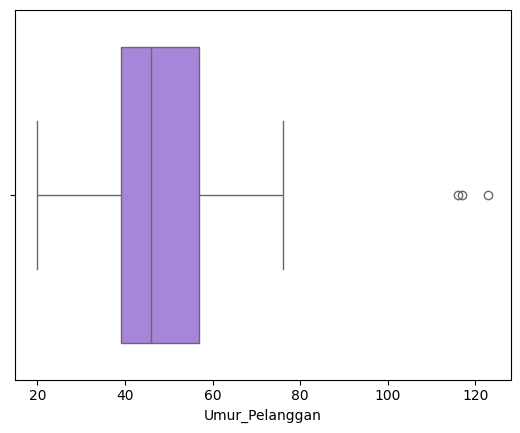

In [52]:
sns.boxplot(df_3, x="Umur_Pelanggan", color="#A378E7D2")
plt.show()

In [53]:
display(df_3.loc[df_3['Umur_Pelanggan'] > 84, ['ID', 'Year_Birth', 'Umur_Pelanggan', 'Education', 'Marital_Status', 'Income', 'Children',
                                        'People', 'lama_jd_Pelanggan', 'Recency','Total_Spending',
                                        'times_transaction', 'NumWebVisitsMonth','TotalAcceptedCmp', 'Complain']])

print(f'Total Income Maksimum adalah $ {df_3['Income'].max()}')
print(f'Total Income Rata-rata adalah $ {df_3['Income'].mean() :.2f}')
print(f'Total Income Mainimum adalah $ {df_3['Income'].min()}')
print(f'Total Spending Maksimum adalah $ {df_3['Total_Spending'].max()}')
print(f'Total Spending Rata-rata adalah $ {df_3['Total_Spending'].mean() :.2f}')
print(f'Total Spending Mainimum adalah $ {df_3['Total_Spending'].min()}')

,ID,Year_Birth,Umur_Pelanggan,Education,Marital_Status,Income,Children,People,lama_jd_Pelanggan,Recency,Total_Spending,times_transaction,NumWebVisitsMonth,TotalAcceptedCmp,Complain
192,7829,1900-01-01,116,2n Cycle,Divorced,73280.0,1,2,3,99,65,5,5,0,1
239,11004,1893-01-01,123,2n Cycle,Single,120364.0,1,2,2,23,22,3,4,0,0
339,1150,1899-01-01,117,PhD,Together,167064.0,0,2,3,36,1853,14,1,1,0


Total Income Maksimum adalah $ 1333332.0
Total Income Rata-rata adalah $ 104485.19
Total Income Mainimum adalah $ 3460.0
Total Spending Maksimum adalah $ 2525
Total Spending Rata-rata adalah $ 605.80
Total Spending Mainimum adalah $ 5


Pelanggan Supermarket dengan rentang Umur 20 tahun sampai dengan 80 tahun dengan ada 3 pelanggan dengan **umur outlier** yaitu **umur 116, 117 dan 123 tahun**. Dimana Pelanggan dengan **ID: 1150** yang sudah berumur **117 tahun** telah memberikan total spending dalam 2 tahun sebanyak **$ 1853** kepada Supermarket dimana total spending pelanggan tersebut **3x** di atas Rata-rata Total Spending secara keseluruhan Pelanggan.

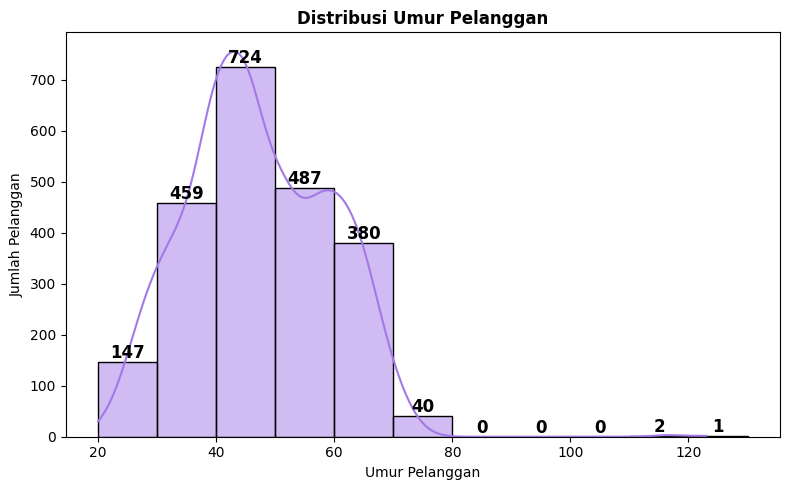

In [54]:

plt.figure(figsize=(8,5))
bins = range(20, 140, 10)

bars = sns.histplot(df_3['Umur_Pelanggan'], bins=bins, color="#A378E7D2", kde=True)
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )
plt.title('Distribusi Umur Pelanggan', fontweight='bold')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()


Berikut adalah Distribusi Umur dari para Pelanggan di Supermarket dimana:
- Pelanggan paling banyak dengan rentang usia 40 - 50 tahun, yaitu sebanyak 724 orang.
- Pelanggan paling banyak kedua dengan rentang usia 51-60 tahun, yaitu sebanyak 487 orang.
- Pelanggan paling banyak ketiga dengan rentang usia 31-40 tahun, yaitu sebanyak 459 orang.
- Pelanggan paling banyak keempat dengan rentang usia 61-70 tahun, yaitu sebanyak 380 orang.

### c. Proportion of Customers With and Without Children

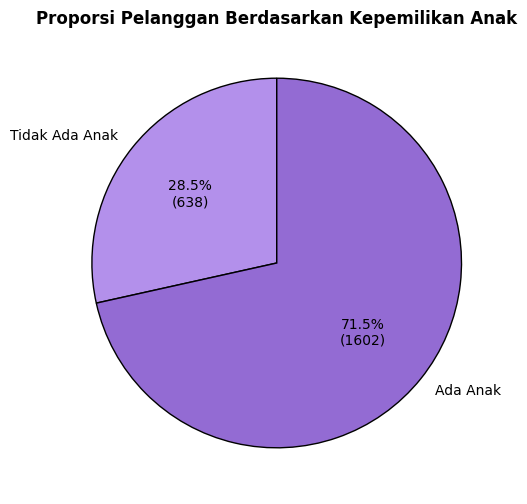

In [55]:
labels = ['Tidak Ada Anak', 'Ada Anak']
jumlah_pelanggan = [(df_3['Children'] == 0).sum(), (df_3['Children'] > 0).sum()]

colors = ["#B7D3F6", "#EFCCE1", '#C3FBD8', '#FFF6AA', '#FAD7B6']

plt.figure(figsize=(6,6))
plt.pie(
    jumlah_pelanggan,
    labels=labels,
    autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p*sum(jumlah_pelanggan)/100),
    startangle=90,
    wedgeprops={'edgecolor':'black'},
    textprops={'fontsize':10, 'color':'black'},
    colors=["#A378E7D2", "#7C4BCAD2"]
)
plt.title('Proporsi Pelanggan Berdasarkan Kepemilikan Anak', fontweight='bold')
plt.show()


- dari 2240 orang pelanggan bahwa sebanyak **71.5%** adalah pelanggan yang sudah memiliki anak, yaitu sebanyak 1602 orang.
- dari 2240 orang pelanggan bahwa sebanyak **28.5%** adalah pelanggan yang belum memiliki anak, yaitu sebanyak 638 orang.

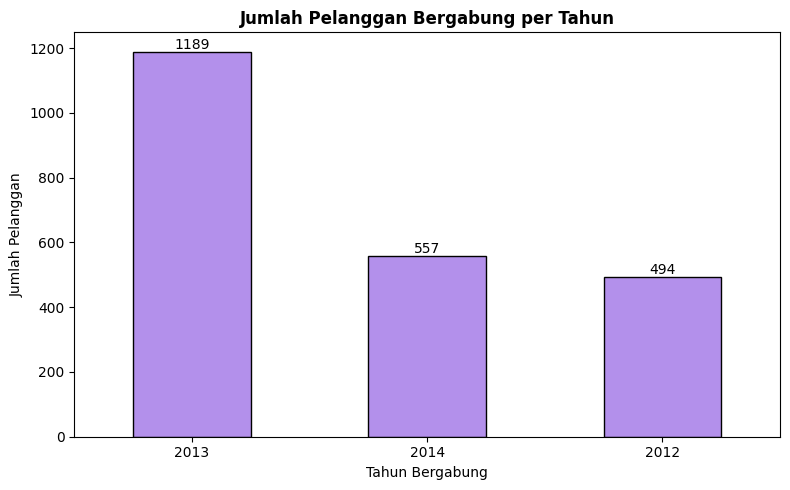

In [56]:
# Jumlah Member Pelanggan Bergabung Setiap Tahun

tahun_join = df_3['Dt_Customer_Year'].value_counts()

plt.figure(figsize=(8,5))
bars = tahun_join.plot(
    kind='bar',
    color="#A378E7D2",
    edgecolor='black'
)

plt.title('Jumlah Pelanggan Bergabung per Tahun', fontweight='bold')
plt.xlabel('Tahun Bergabung')
plt.ylabel('Jumlah Pelanggan')

# tambah nilai angka di atas bar
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center', va='bottom'
    )
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- Tahun paling banyak pelanggan mendaftarkan diri sebagai pelanggan di supermarket adalah pada tahun **2013** sebanyak **1189** orang.
- Tahun paling banyak pelanggan mendaftarkan diri sebagai pelanggan di supermarket adalah padah tahun **2014** sebanyak **557** orang.

In [57]:
print(f'Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah {df_3['Recency'].max()} hari')
print(f'Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah {df_3['Recency'].mean() :.2f} hari')
print(f'Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah {df_3['Recency'].min()} hari')

Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah 99 hari
Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah 49.11 hari
Jumlah hari sejak terakhir kali pelanggan melakukan pembelian adalah 0 hari


Kesimpulan Point 1:

Point 1 ini menjadi awal proses dari analisis mendalam selanjutnya. Saya menaruh ini menjadi tahap awal karena dengan mengerti **Demografi Pelanggan**, dapat membantu pemilik Supermarket untuk membuat dan memilih startegi-strategi bisnis yang sesuai dengan apa yang dibutuhkan oleh pelanggan agar pelanggan merasa dihargai dan dibantu dengan dengan produk-produk yang dijual, fasilitas serta promo-promo yang disajikan oleh tim Supermarket. Supaya dapat membuat dan memilih strategi-strategi yang tepat bagi pelanggan, selanjutnya akan dilakukan analisis **Pola Belanja Pelanggan**.

## 2. Understanding Customer Behavior and Relationship Between Variables

### a. Identifying which Variables Impact Our Sales (Total Spending and Times Transaction) to decide the segmentation (xlabel)

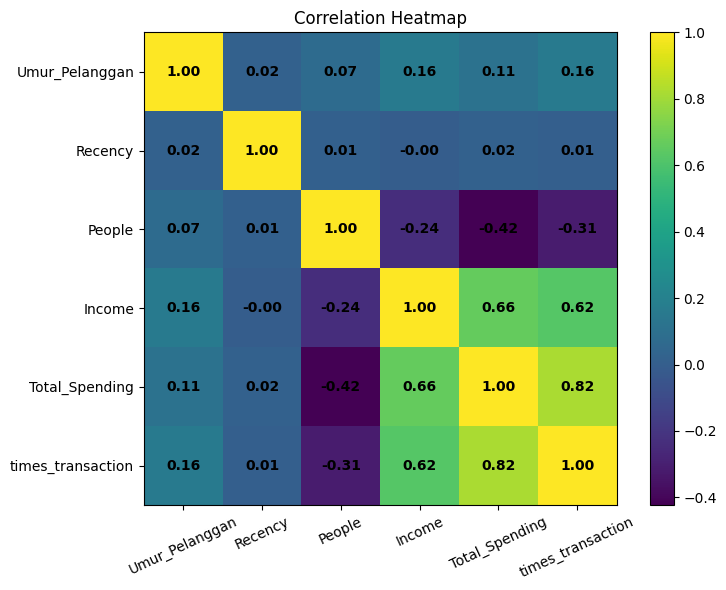

In [58]:
# Variabel-Variabel yang mempengaruhi 'Income', 'Total_Spending' dan 'times_transaction'

cols = ['Umur_Pelanggan', 'Recency', 'People', 'Income', 'Total_Spending', 'times_transaction']

corr = df_3[cols].corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(cols)), cols, rotation=25)
plt.yticks(range(len(cols)), cols)
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(
            j, i, 
            f"{corr.iloc[i, j]:.2f}",
            ha='center', 
            va='center',
            color='black',
            fontweight='bold')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Terlihat bahwa **Income** memiliki nilai correlation yang cukup tinggi terhadap **Total_Spending dan times_transaction**, yaitu: **0.62 - 0.82**. Maka dari itu mari kita lebih dalam menelusuri kolom **Income**.

In [59]:
# Rata-rata 'Income','Total_Spending','times_transaction' berdasarkan Education
display(df_3.groupby('Education')[['Income','Total_Spending','times_transaction']].mean().round(2).sort_values(by='Income', ascending=False))
# Rata-rata Income berdasarkan Umur
# Rata-rata Total Spending berdasarkan Umur

,Income,Total_Spending,times_transaction
Education,,,
PhD,112271.42,672.41,13.45
Master,105781.70,611.78,12.50
Graduation,105427.24,619.90,12.68
2n Cycle,95241.90,496.53,11.56
Basic,40612.52,81.80,5.22


Rata-rata **Income, Total_Spending dan times_transaction** terlihat bahwa pelanggan dengan semakin tinggi level pendidikan (**Education**) semakin tinggi penghasilan yang dihasilkan. Semakin tinggi **income** yang dihasilkan maka semakin sering ia berbelanja yang meningkatkan **Total_Spending**.

C:\Users\Vivi04\AppData\Local\Temp\ipykernel_4304\2750317366.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_3.groupby(['age_bin', 'Education'])['ID'].count().reset_index()


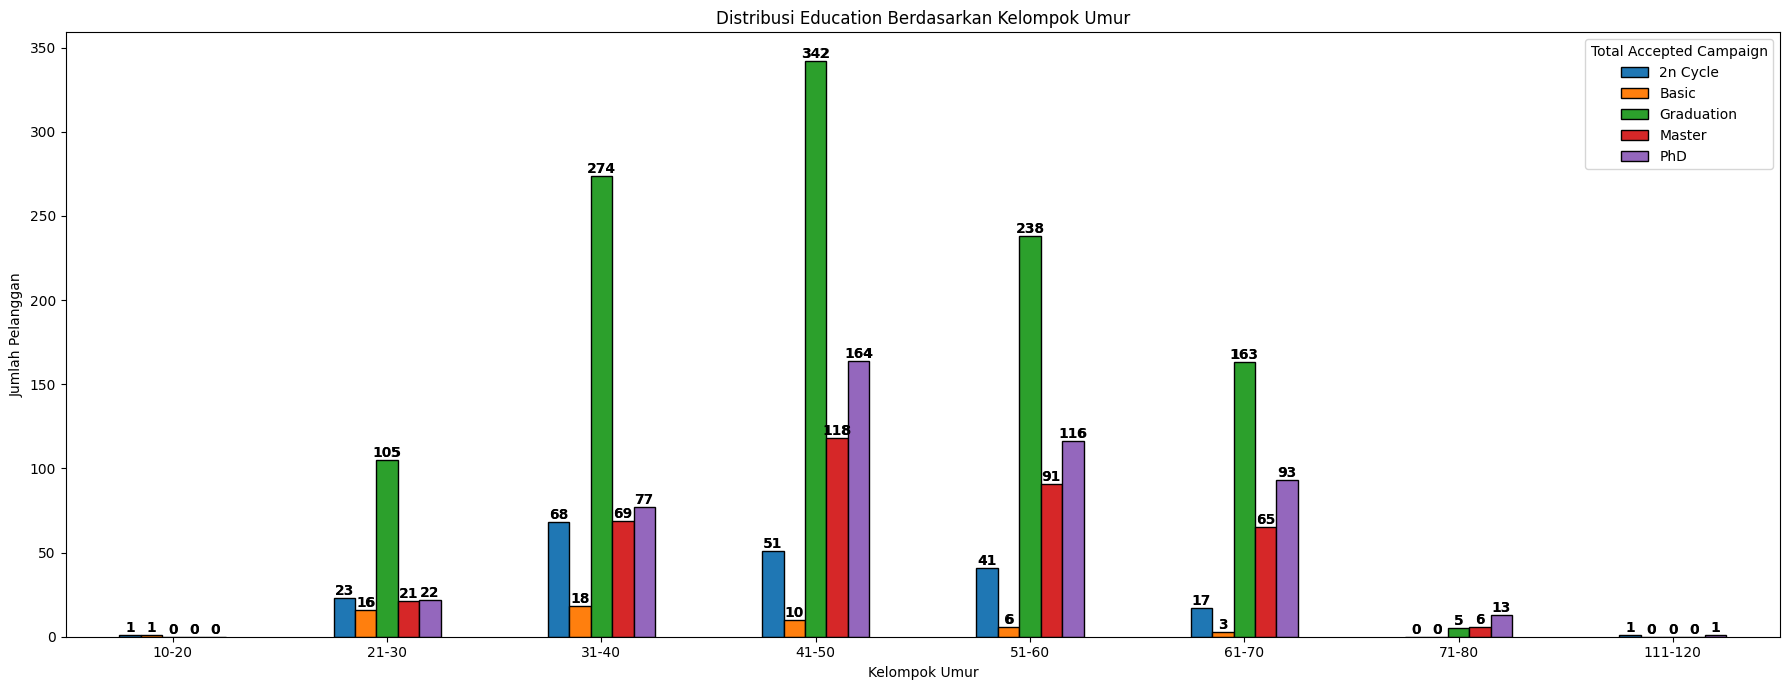

In [60]:
# Distribusi Education Berdasarkan Kelompok Umur

bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']      # bikin rentang umur / bin

df_3['age_bin'] = pd.cut(
    df_3['Umur_Pelanggan'],
    bins=bins,
    labels=labels,
    include_lowest=True)

# group untuk menghitung
grouped = df_3.groupby(['age_bin', 'Education'])['ID'].count().reset_index()

# pivot agar tabel nya jadi bentuk bar chartable
pivoted = grouped.pivot(index='age_bin', columns='Education', values='ID').fillna(0)

# plot bar chart
ax = pivoted.plot(
    kind='bar',
    figsize=(18,7),
    edgecolor='black'
)
# label angka di atas bar (dibikin bold)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',
        fontweight='bold'   # << ini yang bikin tebal
    )

plt.title('Distribusi Education Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Total Accepted Campaign', loc='upper right')

# label angka di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Jika Level pendidikan diurutkan berdasarkan rentang umur 10 - 120 tahun, maka pelanggan yang paling banyak dengan gelar tertinggi yaitu **PhD, Master, dan Graduation** berada di rentang umur 31 - 60 tahun.

In [61]:
# Tabel distribusi Income, Total_Spending dan times_transaction berdasarkan Umur_Pelanggan
# --- 1. Buat kelompok umur ---
bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']
df_3['AgeGroup'] = pd.cut(df_3['Umur_Pelanggan'], bins=bins, labels=labels, right=True)

# --- 2. Hitung rata-rata per kelompok umur ---
agg_table = df_3.groupby('AgeGroup')[['Income','Total_Spending', 'times_transaction']].mean().round(2).sort_values(by='Income', ascending=False)

# --- 3. Tampilkan tabel ---
display(agg_table)


C:\Users\Vivi04\AppData\Local\Temp\ipykernel_4304\2205921968.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_table = df_3.groupby('AgeGroup')[['Income','Total_Spending', 'times_transaction']].mean().round(2).sort_values(by='Income', ascending=False)


,Income,Total_Spending,times_transaction
AgeGroup,,,
71-80,133116.58,1076.00,18.92
111-120,120172.00,959.00,9.50
61-70,116266.63,719.18,14.32
51-60,111865.21,670.67,13.67
41-50,100974.84,551.86,11.95
31-40,96169.89,500.05,11.06
21-30,95899.14,656.82,11.82
10-20,21921.00,69.00,5.00


Tabel tersebut menunjukkan distribusi **Income, Total_Spending dan times_transaction** berdasarkan umur. Terlihat bahwa:
- berbeda dengan data distribusi **Income, Total_Spending dan times_transaction** berdasarkan **Education** dan **Umur_Pelanggan** secara logika total **Income, Total_Spending dan times_transaction** tertinggi berada di rentang **umur 31-60 tahun**.
- Tabel distribusi **Income, Total_Spending dan times_transaction** berdasarkan **Umur_Pelanggan** menampilkan bahwa total **Income, Total_Spending dan times_transaction** tertinggi berada di rentang **umur 51-60, 61-80 tahun dan 111-120 tahun**.
- hukum correlation **(+ 0.62-0.82)** disini juga masih terbukti bahwa semakin tinggi **Income** maka akan semakin tinggi juga **Total_Spending dan times_transaction**.

maka dari itu untuk saat melakukan proses analisis lebih lanjut, saya akan menampilkan detail visualisasi dengan segmentasi berdasarkan rentang **Umur_Pelanggan** dan jika menggunakan **Umur_Pelanggan** segmentasi pelanggan bisa lebih detail daripada Education.

### b. How Complaints Impact Recency, Total Spending, and Times Transaction

In [62]:
# Total Orang yang Pernah Complain
print(f'Jumlah Orang yang pernah complain adalah {df_3['Complain'].sum()} Orang')
print(f'Proporsi Orang yang pernah complain adalah {df_3['Complain'].sum()/len(df_3['Complain'])*100:.2f}%')

Jumlah Orang yang pernah complain adalah 21 Orang
Proporsi Orang yang pernah complain adalah 0.94%


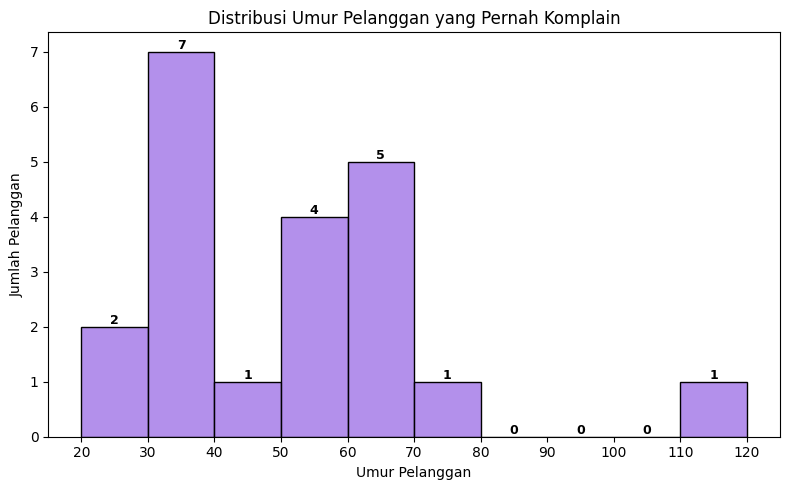

In [63]:
# Grafik Distribusi Complain berdasarkan Umur

complain = df_3[df_3['Complain'] == 1]

plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(
    complain['Umur_Pelanggan'],
    bins=range(20, 130, 10),
    edgecolor='black',
    color="#A378E7D2"
)

for i in range(len(patches)):
    height = n[i]
    plt.text(
        patches[i].get_x() + patches[i].get_width()/2,
        height,
        int(height),
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Distribusi Umur Pelanggan yang Pernah Komplain')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(range(20, 130, 10))
plt.tight_layout()
plt.show()

In [64]:
# Tabel untuk melihat apakah ada perbeddan Recency, Total Spending dan Times Transaction pelanggan yang pernah complain dan tidak 

relation = df_3.groupby('Complain')[['Recency', 'Total_Spending', 'times_transaction']].mean().round(2)

perbedaan_persen = ((relation.loc[1] - relation.loc[0])/relation.loc[0]*100).round(2)
summary_table = relation.copy()
summary_table.loc['perbedaan_persen'] = perbedaan_persen
summary_table


,Recency,Total_Spending,times_transaction
Complain,,,
0,49.07,607.97,12.55
1,53.05,376.43,10.90
perbedaan_persen,8.11,-38.08,-13.15


In [65]:
#Menampilkan Pelanggan yang ada complain dengan total spending dan times transactionnya melebihi rata-rata pelanggan yang tidak complain

customer_complain = df_3[
    (df_3['Complain'] == 1) &
    (df_3['Total_Spending'] > (df_3['Total_Spending'].mean())) &
    (df_3['times_transaction'] > (df_3['times_transaction'].mean()))
][['ID', 'Year_Birth', 'Umur_Pelanggan', 'Education', 'Marital_Status', 'Income', 'Children', 'lama_jd_Pelanggan', 'Total_Spending', 'times_transaction']]

display(customer_complain)
print(f'Rata-rata Total Spending $ {df_3['Total_Spending'].mean().round(2)}')
print(f'Rata-rata times transaction {df_3['times_transaction'].mean().round(2)} kali')
print(f'Terdapat {len(customer_complain)} orang Pelanggan yang total spendingnya melebihi rata-rata spending dari pelanggan yang tidak complain')
print(f'Total Spending dari {len(customer_complain)} orang pelanggan tersebut adalah $ {customer_complain['Total_Spending'].sum()}. Angka ini cukup signifikan bagi pendapatan Supermarket')

,ID,Year_Birth,Umur_Pelanggan,Education,Marital_Status,Income,Children,lama_jd_Pelanggan,Total_Spending,times_transaction
358,6142,1943-01-01,73,Master,Married,130146.0,0,3,900,13
1069,2875,1978-01-01,38,Graduation,Married,134046.0,0,2,906,23
1201,9500,1959-01-01,57,Graduation,Married,116226.0,1,3,758,19
1461,9483,1959-01-01,57,Graduation,Together,115914.0,1,3,637,18
1850,4427,1995-01-01,21,2n Cycle,Single,166514.0,0,4,1365,27
1924,7966,1959-01-01,57,Graduation,Single,161964.0,2,3,1191,27


Rata-rata Total Spending $ 605.8
Rata-rata times transaction 12.54 kali
Terdapat 6 orang Pelanggan yang total spendingnya melebihi rata-rata spending dari pelanggan yang tidak complain
Total Spending dari 6 orang pelanggan tersebut adalah $ 5757. Angka ini cukup signifikan bagi pendapatan Supermarket


Kesimpulan untuk point a:
- Jumlah Pelanggan yang pernah komplain secara keseluruhan sebanyak 21 orang atau 0.94%.
- Jumlah Pelanggan yang paling banyak complain berdasarkan rentang umur adalah **31-40 tahun** sebanyak **7 orang**, disusul dengan pelanggan yang memiliki rentang umur **61-70 tahun sebanyak 5 orang dan 51-60 tahun sebanyak 4 orang**.
- Diantara 21 orang yang pernah komplain terdapat **6 orang** pelanggan yang **total_spending** dan **times_transaction** selama 2 tahun lebih banyak daripada rata-rata **total_spending** dan **times_transaction** keseluruhan pelanggan.
- **total_spending** dari **6 orang** pelanggan ini adalah $5757. Angka ini cukup signifikan jika dibandingkan dengan rata-rata **total_spending** dan **times_transaction** keseluruhan pelanggan.
- Jika dibandingkan dengan ada dan tidaknya pelanggan yang komplain, perbedaan rata-rata **Total_Spending** sebesar **38.08%** dan **times_transaction** sebesar **13.15%**. Perbedaan angka yang tidak terlalu besar ini cukup menggambakan bahwa walaupun hanya 21 orang yang komplain, tetapi total dari **Total_Spending dan times_transaction** nya sangat signifikan yang artinya pelanggan yang komplain adalah kebanyakan adalah **High Spending Customers**

Saran:
- Memiliki pencatatan tersendiri untuk mencatat hal apa saja yang pernah di komplain, siapa yang komplain dan berapa banyak yang komplain terhadap hal yang sama. Hal ini membantu untuk memberikan **insight** ke pemilik Supermarket hal apa yang paling banyak di komplain (Kalau banyak orang komplain hal yang sama berarti memang hal itu telah mengganggu bagi banyak customer).
- Dari Pencatatan komplain tersebut bisa dengan jelas hal-hal apa saja yang pernah dikomplain supaya bisa didiskusikan secara objektif bersama team untuk mengurutkan komplain mana yang harus segera diperbaiki.
- Jika seperti data diatas dimana kebanyakan pelanggan yang komplain adalah **High Spending Customer** yang perlu diperhatikan dengan lebih baik. Jika komplain tersebut adalah memang dari pihak Supermarket yang harus perbaikin maka berikan hadiah kecil sebagai permintaan maaf atau terima kasih atas perhatiannya, seperti kupon diskon atau promo bundling khusus sesuai dengan **demografi pelanggan** dan **pola belanja** yang biasanya pelanggan tersebut suka lakukan (pola belanja pelanggan akan dilakukan pada proses analisis selanjutannya) supaya menarik **High Spending Customer** untuk berbelanja kembali juga membuat **High Spending Customer** merasa dihargai dan diperhatikan dengan harapan tetap menjadi pelanggan setia Supermarket ini.

### c. How Campaigns Impact Recency, Total Spending and Times Transaction

C:\Users\Vivi04\AppData\Local\Temp\ipykernel_4304\8550546.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_3.groupby(['age_bin', 'TotalAcceptedCmp'])['ID'].count().reset_index()


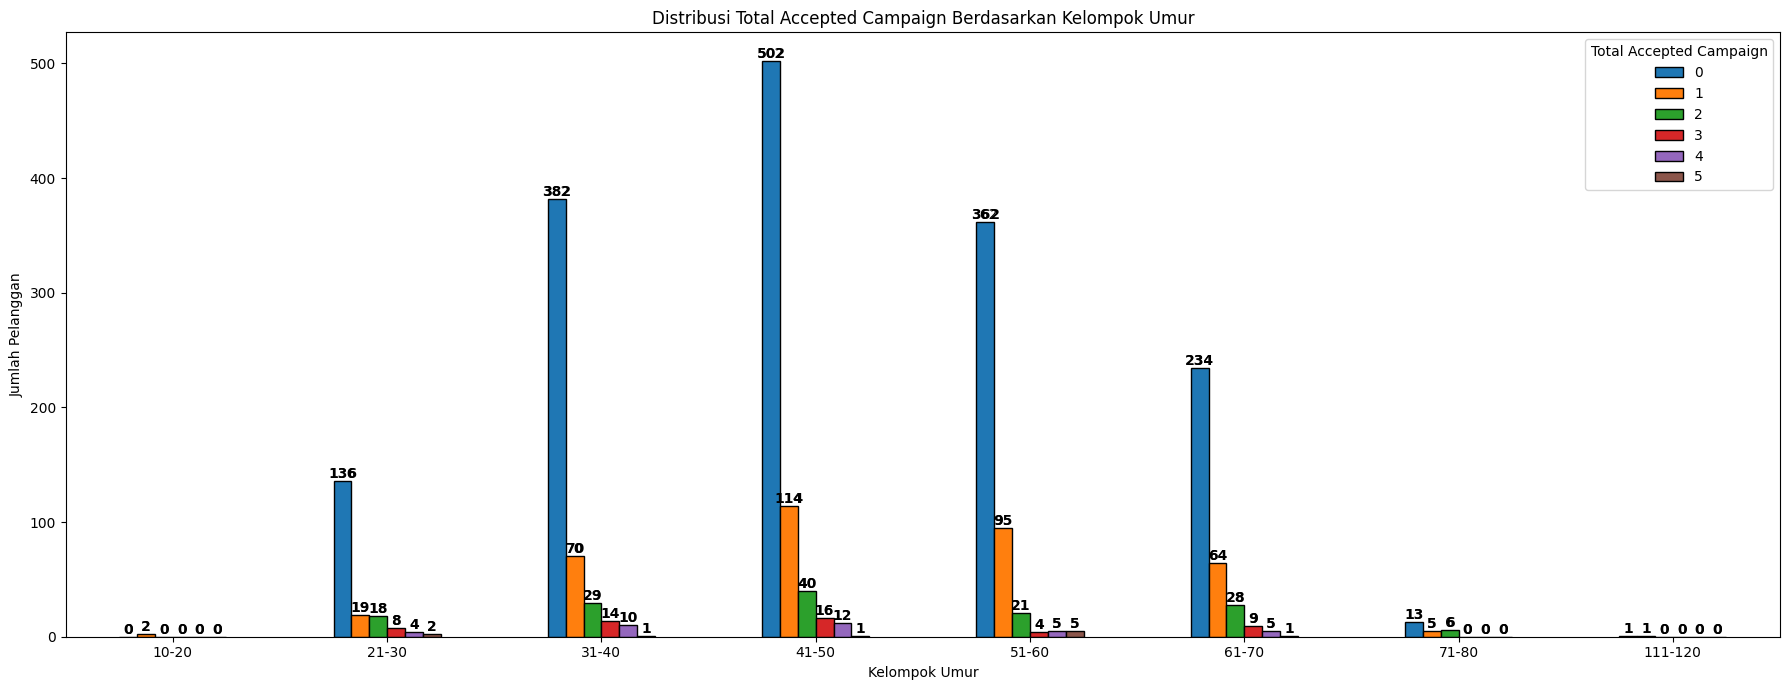

In [66]:
# Penerima Campaign berdasarkan umur

bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']    # bikin rentang umur / bin

df_3['age_bin'] = pd.cut(
    df_3['Umur_Pelanggan'],
    bins=bins,
    labels=labels,
    include_lowest=True)

# group untuk menghitung
grouped = df_3.groupby(['age_bin', 'TotalAcceptedCmp'])['ID'].count().reset_index()

# pivot agar tabel nya jadi bentuk bar chartable
pivoted = grouped.pivot(index='age_bin', columns='TotalAcceptedCmp', values='ID').fillna(0)

# plot bar chart
ax = pivoted.plot(
    kind='bar',
    figsize=(18,7),
    edgecolor='black'
)
# label angka di atas bar (dibikin bold)
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',
        fontweight='bold'   # << ini yang bikin tebal
    )

plt.title('Distribusi Total Accepted Campaign Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Total Accepted Campaign', loc='upper right')

# label angka di atas setiap bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
impact_campaign = df_3.groupby('TotalAcceptedCmp')[['Total_Spending','times_transaction']].mean().round(2)

# Tambahkan jumlah orang
impact_campaign['jumlah_orang'] = df_3.groupby('TotalAcceptedCmp').size()

# Hitung % increase
impact_campaign['Total_Spending_%'] = (impact_campaign['Total_Spending'].pct_change().fillna(0) * 100).round(2)
impact_campaign['times_transaction_%'] = (impact_campaign['times_transaction'].pct_change().fillna(0) * 100).round(2)

impact_campaign = impact_campaign[['jumlah_orang','Total_Spending','times_transaction', 'Total_Spending_%', 'times_transaction_%']]
display(impact_campaign)


,jumlah_orang,Total_Spending,times_transaction,Total_Spending_%,times_transaction_%
TotalAcceptedCmp,,,,,
0,1631,458.11,11.32,0.00,0.00
1,370,830.10,14.73,81.20,30.12
2,142,1066.59,15.82,28.49,7.40
3,51,1486.92,19.47,39.41,23.07
4,36,1673.53,20.31,12.55,4.31
5,10,1514.00,20.30,-9.53,-0.05


: 

In [84]:
# Menampilkan Campaign mana yang efektif meningkatkan Total_Spending dan times_transaction
cmp_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6']
target_cols = ['Total_Spending','times_transaction']

result = pd.DataFrame()
prev_avg = None

for cmp in cmp_cols:
    # pilih customer yang menerima campaign
    data = df_3[df_3[cmp]==1][target_cols]
    
    # jumlah customer yang menerima campaign
    n_people = len(data)
    
    # rata-rata, dibulatkan 2 desimal
    avg = (data.sum() / n_people).round(2)
    
    # hitung % increase dibanding campaign sebelumnya
    if prev_avg is not None:
        perc_increase = ((avg - prev_avg) / prev_avg * 100).round(2)
        perc_increase = perc_increase.map(lambda x: f"{x:.2f} %")
        perc_increase.index = [c+'_pct_increase' for c in target_cols]
    else:
        perc_increase = pd.Series([None]*len(target_cols), index=[c+'_pct_increase' for c in target_cols])
    
    # format rata-rata dengan 2 desimal + konversi ke string
    avg_fmt = avg.map(lambda x: f"{x:.2f}")
    
    # buat baris tabel, Campaign paling kiri
    row = pd.concat([pd.Series({'Campaign': cmp, 'Total_People': n_people}), avg_fmt, perc_increase])
    
    # simpan avg numeric untuk next loop
    prev_avg = avg.copy()
    
    # gabungkan ke result
    result = pd.concat([result, row.to_frame().T], ignore_index=True)

# tampilkan tabel
display(result)


,Campaign,Total_People,Total_Spending,times_transaction,Total_Spending_pct_increase,times_transaction_pct_increase
0,AcceptedCmp1,144,1482.22,19.89,None,None
1,AcceptedCmp2,30,1307.67,18.23,-11.78 %,-8.35 %
2,AcceptedCmp3,163,720.54,13.26,-44.90 %,-27.26 %
3,AcceptedCmp4,167,1143.13,17.55,58.65 %,32.35 %
4,AcceptedCmp5,163,1616.11,19.77,41.38 %,12.65 %
5,AcceptedCmp6,334,987.39,15.37,-38.90 %,-22.26 %


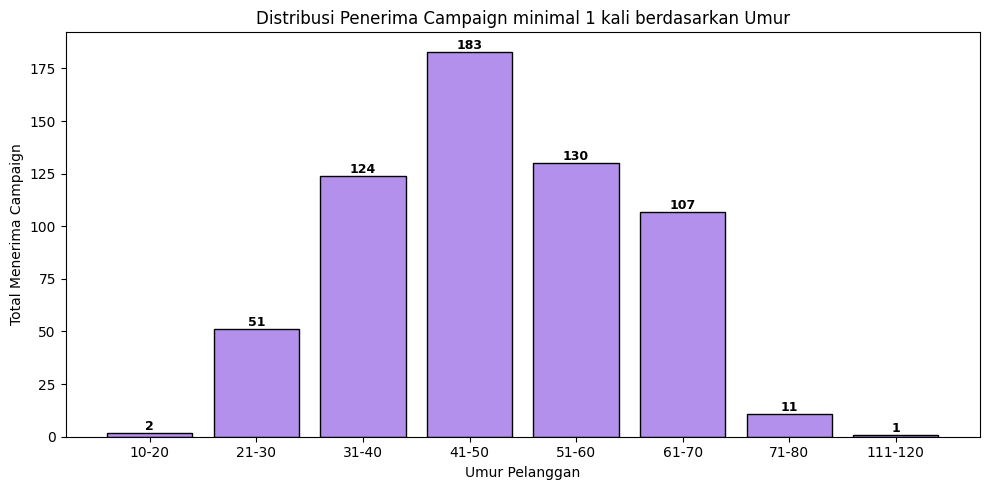

In [70]:
# Grafik Distribusi Penerima Campaign minimal 1x berdasarkan Umur

bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']
campaign = df_3[df_3['TotalAcceptedCmp'] > 0].copy()

campaign['age_bin'] = pd.cut(
    campaign['Umur_Pelanggan'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

counts = campaign['age_bin'].value_counts().sort_index()

plt.figure(figsize=(10,5))
bars = plt.bar(
    counts.index,
    counts.values,
    edgecolor='black',
    color="#A378E7D2"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Distribusi Penerima Campaign minimal 1 kali berdasarkan Umur')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Total Menerima Campaign')
plt.tight_layout()
plt.show()

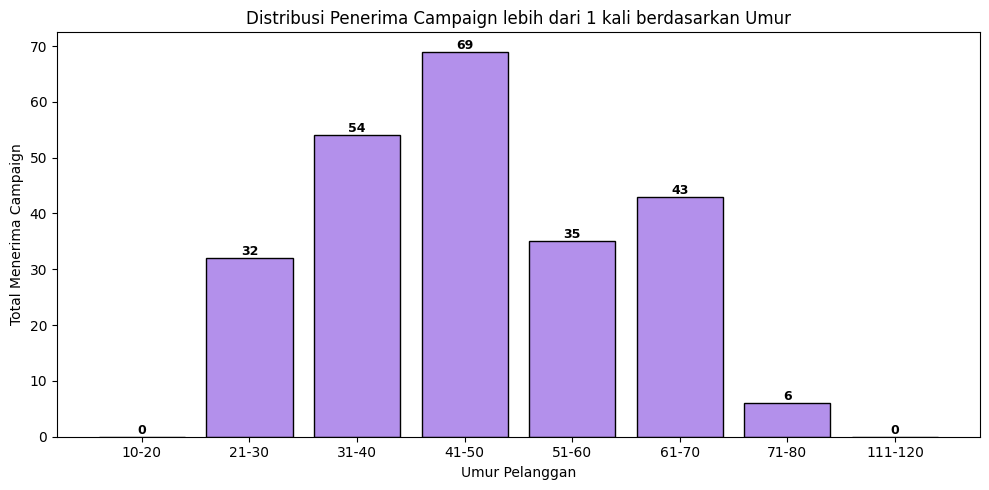

In [71]:
# Grafik Distribusi Penerima Campaign lebih dari 1x berdasarkan Umur

bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']
campaign = df_3[df_3['TotalAcceptedCmp'] > 1].copy()

campaign['age_bin'] = pd.cut(
    campaign['Umur_Pelanggan'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

counts = campaign['age_bin'].value_counts().sort_index()

plt.figure(figsize=(10,5))
bars = plt.bar(
    counts.index,
    counts.values,
    edgecolor='black',
    color="#A378E7D2"
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

plt.title('Distribusi Penerima Campaign lebih dari 1 kali berdasarkan Umur')
plt.xlabel('Umur Pelanggan')
plt.ylabel('Total Menerima Campaign')
plt.tight_layout()
plt.show()

In [72]:
# --- 1. Buat kelompok umur ---
bins = [10,20,30,40,50,60,70,80,120]
labels = ['10-20','21-30','31-40','41-50','51-60','61-70','71-80','111-120']
df_3['AgeGroup'] = pd.cut(df_3['Umur_Pelanggan'], bins=bins, labels=labels, right=True)

# --- 2. Hitung rata-rata per kelompok umur ---
agg_table1 = df_3.groupby('AgeGroup')[['Total_Spending', 'times_transaction']].mean().round(2).sort_values(by='Total_Spending', ascending=False)

# --- 3. Tampilkan tabel ---
display(agg_table1)

C:\Users\Vivi04\AppData\Local\Temp\ipykernel_4304\1166866994.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_table1 = df_3.groupby('AgeGroup')[['Total_Spending', 'times_transaction']].mean().round(2).sort_values(by='Total_Spending', ascending=False)


,Total_Spending,times_transaction
AgeGroup,,
71-80,1076.00,18.92
111-120,959.00,9.50
61-70,719.18,14.32
51-60,670.67,13.67
21-30,656.82,11.82
41-50,551.86,11.95
31-40,500.05,11.06
10-20,69.00,5.00


Kesimpulan point c:

Dari total 2240 pelanggan terdapat:
- Terdapat sebanyak **1631 pelanggan atau sebesar 72.81%** yang tidak menerima campaign.
- Terdapat sebanyak **609 pelanggan atau sebesar 27.19%** yang menerima campaign, dimana sebanyak **239 pelanggan atau sebesar 10.67%** menerima campaign lebih daripada 1 kali.
- Rentang Umur penerima campaign adalah:
  - Umur **41-50 tahun** dengan total **183 orang**,
  - Umur **51-60 tahun** dengan total **130 orang**,
  - Umur **31-40 tahun** dengan total **124 orang**, dan
  - Umur **61-70 tahun** dengan total **107 orang**

Dari **Tabel untuk melihat impact dari banyaknya menerima Campaign** terlihat bahwa dengan menerima 1x campaign saja sudah dapat meningkatkan **Total_Spending sebesar 81.2%** dan **times_transaction sebesar 30.12%**

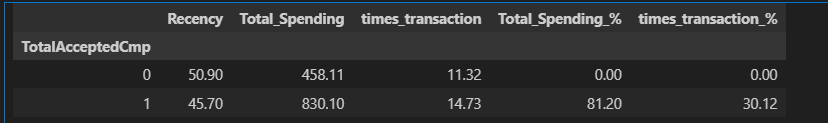

Saran:
Berdasarkan data diatas maka saya menyarankan untuk ada pencatatan tersendiri untuk detail campaign untuk membantu dalam hal:
- Melakukan campaign boleh berkali- kali asalkan memastikan penerima campaign adalah bukan pelanggan yang sudah pernah menerima campaign sebelumnya (1 pelanggan hanya menerima 1x campaign) sehingga campaign bisa diterima oleh lebih banyak pelanggan. Karena menurut data, kenaikan **Total_Spending dan times_transaction** dari pelanggan yang sudah pernah menerima campaign sebelumnya tidaklah signifikan (tidak efektif).
- Fokus Campaign memastikan bahwa pelanggan dengan rentang umur **61-120 tahun** menerima campaign yang dilakukan oleh supermarket karena pelanggan dengan rentang umur ini merupakah **High Total_Spending and times_transaction Customer**. Menurut data:
  - Umur **61-70 tahun** dari 380 orang pelanggan hanya **107 pelanggan** yang menerima campaign dimana didalamnya termasuk **43 pelanggan** yang menerima campaign lebih dari 1x (jadi campaign yang efektif hanyak diterima oleh **64 pelanggan**).
  - Umur **71-80 tahun** dari **40 pelanggan** hanya **11 pelanggan** yang menerima campaign dimana didalamnya termasuk **6 pelanggan** yang menerima campaign lebih dari 1x (jadi campaign yang efektif hanyak diterima oleh **5 pelanggan**).
- Berdasarkan data, lakukanlah metode campaign yang dilakukan saat campaign ke-4 karena kenaikan **Total_Spending sebesar 58.65% dan times_transaction sebesar 32.35** saat dilakukannya campaign 4 dibandingkan dengan **Total_Spending dan times_transaction** di Campaign sebelum dan setelahnya.

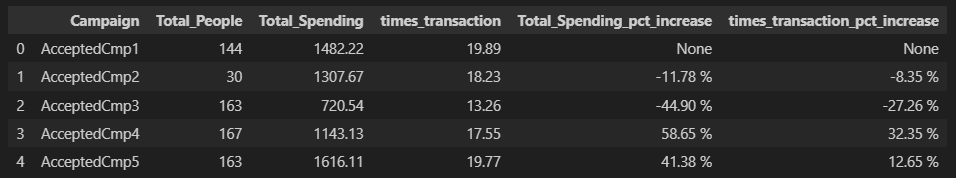


### d. Best-Selling Products

In [73]:
# Menampilkan produk apa yang paling banyak dibeli oleh Pelanggan
produk = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds']

for p in produk:
    jumlah = (df_3[p] > 0).sum()
    persen = jumlah / len(df_3['ID']) * 100
    print(f"{p}: {jumlah} orang")
    print(f"{p}: {persen:.2f} %")

MntWines: 2227 orang
MntWines: 99.42 %
MntFruits: 1840 orang
MntFruits: 82.14 %
MntMeatProducts: 2239 orang
MntMeatProducts: 99.96 %
MntFishProducts: 1856 orang
MntFishProducts: 82.86 %
MntSweetProducts: 1821 orang
MntSweetProducts: 81.29 %
MntGoldProds: 2179 orang
MntGoldProds: 97.28 %


In [74]:

# daftar produk
produk = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# pastikan semua kolom ada
missing = [p for p in produk + ['Total_Spending'] if p not in df_3.columns]
if missing:
    raise KeyError(f"Kolom berikut tidak ditemukan di df_3: {missing}")

# hitung metrik per produk
rows = []
total_overall = df_3['Total_Spending'].sum()

for p in produk:
    series = df_3[p].fillna(0)              # aman terhadap NaN
    total_spending = series.sum()
    max_spending = series.max()
    mean_spending = series.mean()
    proporsi = (total_spending / total_overall * 100) if total_overall != 0 else 0
    rows.append({
        'Product': p,
        'Total_Spending': total_spending,
        'Max_Spending': max_spending,
        'Mean_Spending': mean_spending,
        'Proporsi_Spending_%': proporsi
    })

summary = pd.DataFrame(rows).set_index('Product')

# formatting: Total & Max sebagai integer, Mean 2 desimal, Proporsi 2 desimal
summary_formatted = summary.copy()
summary_formatted['Total_Spending'] = summary_formatted['Total_Spending'].round(0).astype(int)
summary_formatted['Max_Spending'] = summary_formatted['Max_Spending'].round(0).astype(int)
summary_formatted['Mean_Spending'] = summary_formatted['Mean_Spending'].round(2)
summary_formatted['Proporsi_Spending_%'] = summary_formatted['Proporsi_Spending_%'].round(2)

# tampilkan tabel rapi
display(summary_formatted)


,Total_Spending,Max_Spending,Mean_Spending,Proporsi_Spending_%
Product,,,,
MntWines,680816,1493,303.94,50.17
MntFruits,58917,199,26.30,4.34
MntMeatProducts,373968,1725,166.95,27.56
MntFishProducts,84057,259,37.53,6.19
MntSweetProducts,60621,263,27.06,4.47
MntGoldProds,98609,362,44.02,7.27


C:\Users\Vivi04\AppData\Local\Temp\ipykernel_4304\681382369.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_3.groupby('age_bin').agg(


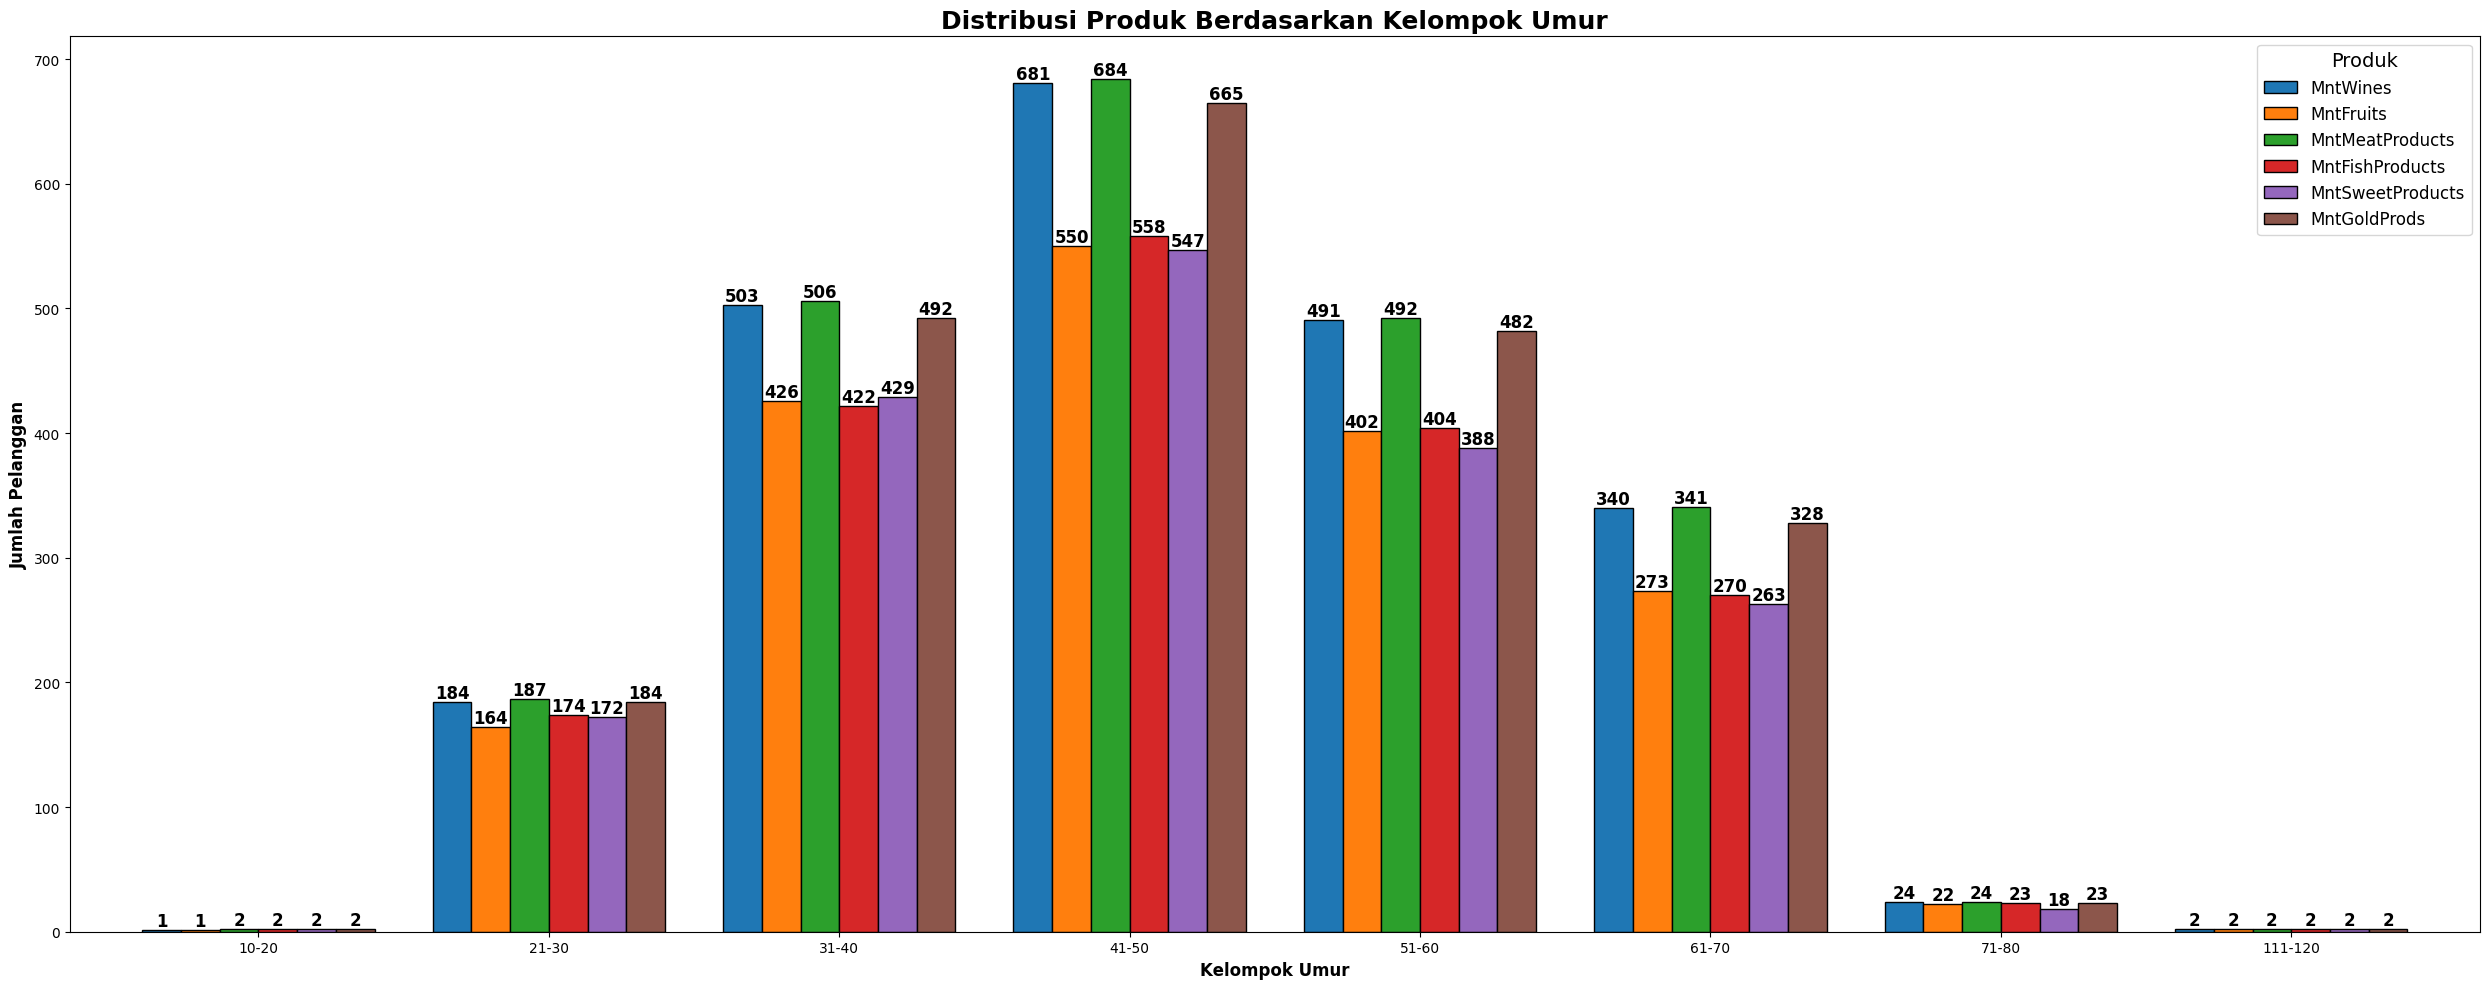

In [75]:
# Hitung jumlah pelanggan yang membeli tiap produk per age_bin
grouped = df_3.groupby('age_bin').agg(
    {p: lambda x: (x > 0).sum() for p in produk}
).reset_index()

# Plot
ax = grouped.set_index('age_bin').plot(
    kind='bar',
    figsize=(25,10),
    edgecolor='black',
    width=0.8  
)

# Label angka di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=12, fontweight='bold')

plt.title('Distribusi Produk Berdasarkan Kelompok Umur', fontsize=18, fontweight='bold')
plt.xlabel('Kelompok Umur', fontsize=12, fontweight='bold')
plt.ylabel('Jumlah Pelanggan', fontsize=12, fontweight='bold')
plt.legend(title='Produk', loc='upper right', fontsize=12, title_fontsize=14, markerscale=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Kesimpulan point d:
- Rata-rata penjualan setiap produknya cukup bagus yaitu diatas 81% persen dari total keseluruhan pelanggan. Artinya Supermarket sudah menjual Produk yang sudah sesuai dengan kebutuhan pelanggannya.
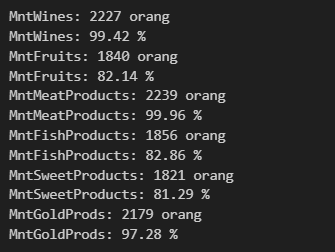
- 3 produk teratas yang memberikan Supermarket Omset yang paling tinggi (dilihat dari **Total_Spending** pelanggan) adalah:
  - wine (**MntWines**) dengan total : $ 680,816 yaitu 50.17 % dari total keseluruhan total spending
  - daging (**MntMeatProducts**) dengan total: $ 373,968 yaitu 27.56 % dari total keseluruhan total spending
  - Emas (**MntGoldProds**) dengan total: $ 98,609 yaitu 7.27 % dari total keseluruhan total spending

Saran:
- Rata-rata penjualan tiap produknya sudah cukup bagus. Saya yang bisa saya berikan untuk masukan yang mungkin Pemilik dan tim Supermarket bisa pertimbangkan yaitu menawarkan kepada pelanggan mengenai Promo Bundling antara produk 1 dengan produk yang lainnya untuk menaikkan jumlah penjualan produk lainnya seperti **MntFruits, MntFishProducts dan MntSweetProducts**.
- walaupun tingkat penjualan sudah baik, pemilik tetap harus memperhatikan dan menjaga kualitas dan ketersediaan produk agar penjualan tidak turun. Hal ini saya merekomendasikan pemilik dan tim supermarket untuk mempertimbangkan adanya tambahan catatan khusus Produk secara lebih detail seperti jumlah hari yang dibutuhkan dari order pembelian sampai barang sampai, untuk memastikan produk selalu tersedia dan kualitas fresh untuk pelanggan.

### e. The Impact of Discounts on Total Spending and Times Transaction

In [76]:
# Buat tabel jumlah pelanggan berdasarkan jumlah pembelian dengan diskon
tabel_deals = (df_3['NumDealsPurchases'].value_counts().sort_index().reset_index())

tabel_deals.columns = ['NumDealsPurchases', 'Jumlah_Pelanggan']
tabel_deals['%'] = (tabel_deals['Jumlah_Pelanggan'] / len(df_3['ID']) * 100).round(2)
display(tabel_deals)



,NumDealsPurchases,Jumlah_Pelanggan,%
0,0,46,2.05
1,1,970,43.30
2,2,497,22.19
3,3,297,13.26
4,4,189,8.44
5,5,94,4.20
6,6,61,2.72
7,7,40,1.79
8,8,14,0.62
9,9,8,0.36


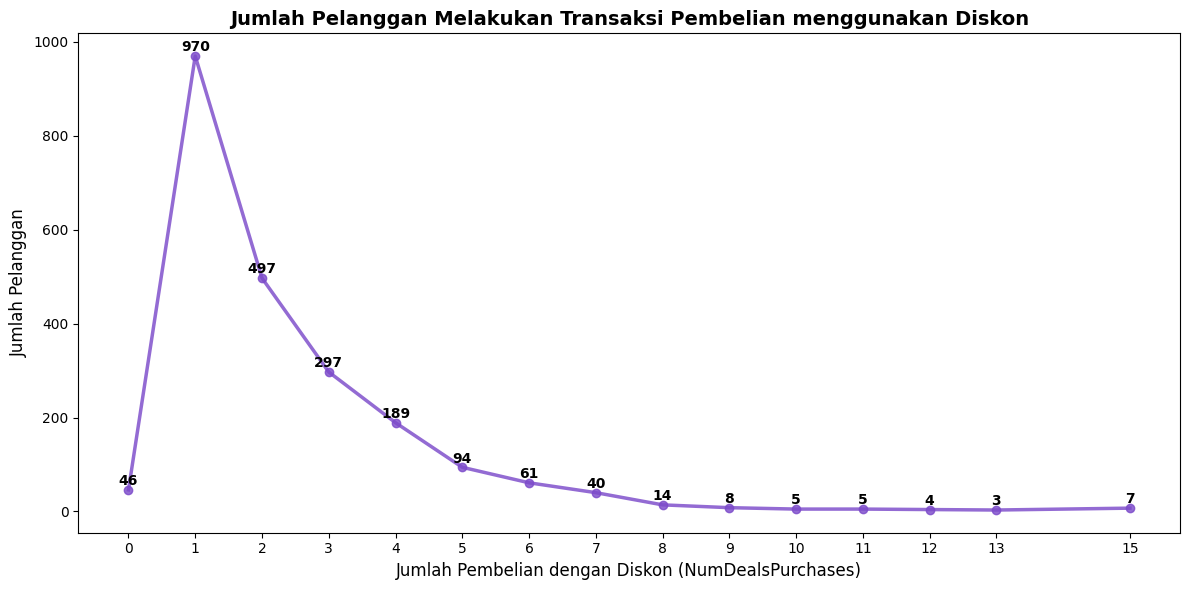

In [77]:
# Data
x = tabel_deals['NumDealsPurchases']
y = tabel_deals['Jumlah_Pelanggan']

plt.figure(figsize=(12,6))
plt.plot(x, y, marker='o', linewidth=2.5, color="#7C4BCAD2")

# Tambahkan label angka di tiap titik
for i, val in enumerate(y):
    plt.text(x[i], y[i] + 10, str(val),
             ha='center', fontsize=10, fontweight='bold')

plt.title("Jumlah Pelanggan Melakukan Transaksi Pembelian menggunakan Diskon",
          fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Pembelian dengan Diskon (NumDealsPurchases)", fontsize=12)
plt.ylabel("Jumlah Pelanggan", fontsize=12)

plt.grid(False)
plt.xticks(x)
plt.tight_layout()
plt.show()



Kesimpulan point e:

Berdasarkan Data dapat menyimpulkan bahwa pelanggan tidak begitu tertarik berbelanja menggunakan diskon karena:
- sebanyak **970** pelanggan cuma transaksi 1 kali menggunakan diskon atau sebesar **43.30 %**
- sebanyak **497** pelanggan cuma transaksi 2 kali menggunakan diskon atau sebesar **22.19 %**
- sebanyak **297** pelanggan cuma transaksi 3 kali menggunakan diskon atau sebesar **13.26 %**

Saran:

Saran saya untuk point ini juga tidak banyak, saya menyarankan adanya pencatatan khusus diskon lebih detail, seperti:
- Diskon berapa persen?, Produk apa saja yang ada diskon?, Apakah diskon bersyarat atau tidak? (seperti daftar member baru dapat diskon welcoming member atau diskon dengan syarat lain). Hal ini untuk sebagai bahan evaluasi.
- Selain itu Pemilik dan tim Supermarket bisa dipertimbangkan untuk produk-produk yang memiliki **high Total_Spending dan times_transaction** bisa digabungkan dengan promo bundling dengan produk lainnya sehingga mengajak pelanggan untuk spending lebih banyak dan menaikkan penjualan produk lainnya seperti **MntFruits, MntFishProducts dan MntSweetProducts** (strategi ini berdasarkan dasar pemikiran psikologis konsumen: "kalau di hitung satuan dengan harga biasa, harga untuk produk high demand dalam promo bundling bisa lebih murah, jika dibandingkan dengan beli satuan produk high demand seperti beli produk dengan harga biasa tapi mendapatkan bomus produk-produk lainnya).
- Hal ini mungkin dapat dipertimbangkan karena rata-rata Tingkat pembelian setiap produk ada di 80% dimana artinya setiap pelanggan melakukan pembelian sebagian besar produk supermarket. 

### f. Store yang mana yang sering dikunjungi oleh Pelanggan

In [78]:
# Menampilkan proporsi Market Place apa yang paling banyak dibeli oleh customer
market_place = ['NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases']
for m in market_place:
    proporsi = (df_3[m].sum())/(df_3[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().sum())*100
    print(m, (df_3[m].sum()), 'kali transaksi')
    print(f'{m}: {proporsi:.2f} % dari total keseluruhan transaksi')

NumWebPurchases 9150 kali transaksi
NumWebPurchases: 32.58 % dari total keseluruhan transaksi
NumCatalogPurchases 5963 kali transaksi
NumCatalogPurchases: 21.23 % dari total keseluruhan transaksi
NumStorePurchases 12970 kali transaksi
NumStorePurchases: 46.18 % dari total keseluruhan transaksi


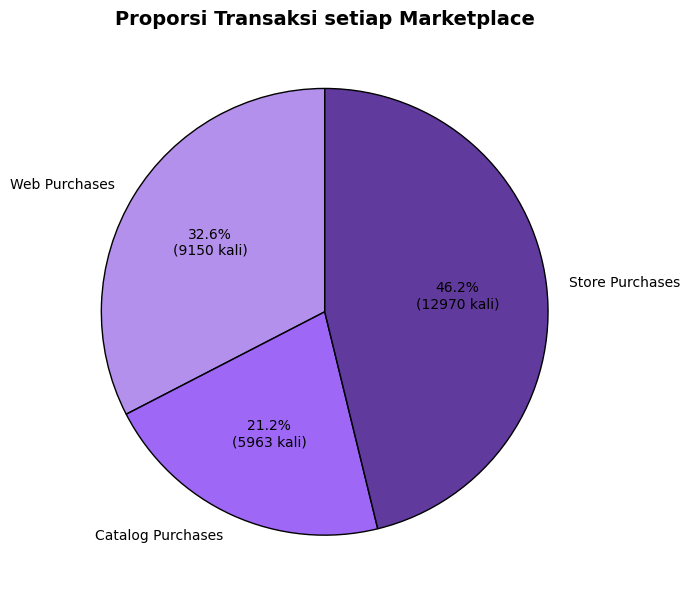

In [79]:
# Bentuk Pie Chart Marketplace yang dipakai
# Daftar marketplace
market_place = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Hitung total masing-masing marketplace (sesuai rumus kamu)
total_web = df_3['NumWebPurchases'].sum()
total_catalog = df_3['NumCatalogPurchases'].sum()
total_store = df_3['NumStorePurchases'].sum()

# Total transaksi keseluruhan
total_all = total_web + total_catalog + total_store

# Siapkan data untuk pie chart
labels = ['Web Purchases', 'Catalog Purchases', 'Store Purchases']
jumlah = [total_web, total_catalog, total_store]

# Buat pie chart
plt.figure(figsize=(7,7))
plt.pie(
    jumlah,
    labels=labels,
    autopct=lambda p: '{:.1f}%\n({:.0f} kali)'.format(p, p*total_all/100),
    startangle=90,
    wedgeprops={'edgecolor':'black'},
    textprops={'fontsize':10},
    colors=["#A378E7D2", "#8946F5D2", "#3F108AD2"]
)

plt.title('Proporsi Transaksi setiap Marketplace', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



Kesimpulan Point g:

Market palce yang paling banyak dikunjungi oleh pelangan adalah belanja melalui website dan offline store, tapi jika diururtkan market place dimana transaksi paling banyak terjadi adalah:
- Offline Store (**NumStorePurchases**), yaitu sebanyak **12970 kali** atau sebesar **46.18 %** dari total keseluruhan transaksi.
- Website Supermarket (**NumWebPurchases**), yaitu sebanyak **9150 kali** atau sebesar **32.58 %** dari total keseluruhan transaksi.

Saran:
- menambah catatan khusus setiap Market Place nya untuk mencatat setiap market place terjadi transaksi produk apa saja, nilai spending setiap market place.
- berdasarkan data yang ada saya menyarankan lebih difokuskan untuk 2 market place ini, untuk **Offline Store** fasilitas dan kenyamanan (seperti: AC, lampu, aroma ruangan supermarket dan toilet, kebersihan, dst) pastikan tetap terjaga untuk pelanggan berbelanja disana. Perhatikan pegawai-pegawai yang standby untuk tetap ramah dan siap membantu pelanggan yang butuh bantuan. Kalau ada budget lebih untuk promosi boleh dicoba strategi menghias Offline Store sesuai tema Season (misalnya: November-Desember hiasan natal dan dipasang lagu2 natal) untuk menambah mood pelanggan yang sedang berbelanja. Bisa dipadukan dengan event seperti pengumpulan stiker kupon untuk hadiah tertentu, diskon, atau promo bundling selama event berlangsung untuk mengajak pelanggan berbelanja lebih banyak.
- Untuk Website Supermarket, pastikan website tidak lagging saat klik fitur tertentu, mudah dimengerti, warna dan desain website yang nyaman dilihat mata karena ada usia pengguna website yang lumayan berumur yaitu umur **51-120 tahun**.
- Untuk Katalog sama seperti campaign, dibutuhkan pencatatan khusus untuk mencatat alamat customer, distribusi pengiriman dan checklist bahwa customer itu sudah dipastikan sudah menerima katalog terbaru. Pastikan juga customer service untuk pembelian melalui Katalog respon dengan cepat dan sabar menangani pelanggan agar pelanggan merasa diperhatikan dan dihargai sehingga Supermarket memiliki reputasi di mata pelanggan. Jika melayani pengiriman juga, pastikan bahwa pengiriman rapih, aman dan tepat waktu sampai ke tujuan sesuai dengan yang telah dijanjikan ke pelanggan. Atau bisa dipertimbangkan juga untuk pelanggan yang rentang usianya masih muda bisa dikirimkan e-catalog dan survey, karena jika ternyata respon dari e-catalog ini bagus dari sisi perusahaan akan lebih hemat biaya pengiriman catalog dan hemat waktu karena lebih praktis.
- Untuk meningkatkan belanja pelanggan dan meningkatkan banyaknya transaksi setiap market place, bisa dicoba strategi untuk menerapkan event, kampaign, diskon, dll yang berbeda-beda di setiap marketplace nya.

### g. Accelerating the Conversion of Website Visits into Purchase Transactions on the Supermarket’s Website

In [80]:
# Rata-rata Konversi Kunjungan Website ke transaksi dalam 2 tahun

website_visits = (df_3['NumWebVisitsMonth'].mean())*24
website_purchase = (df_3['NumWebPurchases'].mean())
print(f'Rata-rata kunjungan ke website supermarket dalam 2 tahun adalah sebanyak {website_visits:.2f} kali kunjungan')
print(f'Rata-rata transaksi melalui website supermarket dalam 2 tahun adalah sebanyak {website_purchase:.2f} kali transaksi')

konversi_website = website_purchase/website_visits*100
print(f'Rata-rata konversi kunjungan menjadi transaksi di website supermarket dalam 2 tahun adalah sebesar {konversi_website:.2f} %')

Rata-rata kunjungan ke website supermarket dalam 2 tahun adalah sebanyak 127.60 kali kunjungan
Rata-rata transaksi melalui website supermarket dalam 2 tahun adalah sebanyak 4.08 kali transaksi
Rata-rata konversi kunjungan menjadi transaksi di website supermarket dalam 2 tahun adalah sebesar 3.20 %


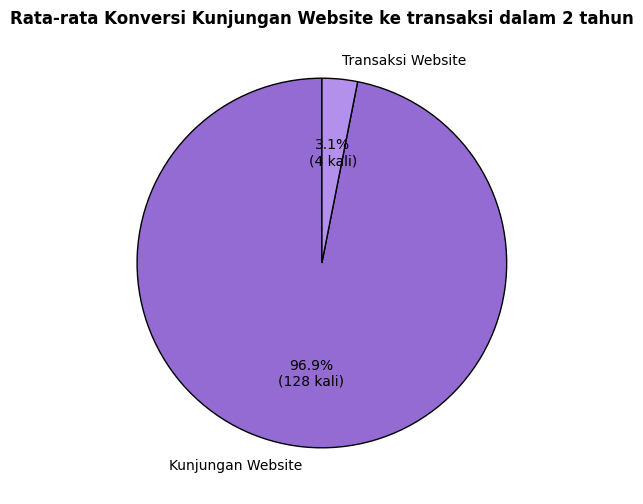

In [81]:
# Hitung angka kunjungan & transaksi
website_visits = (df_3['NumWebVisitsMonth'].mean()) * 24
website_purchase = df_3['NumWebPurchases'].mean()

# Bikin list data
labels = ['Kunjungan Website', 'Transaksi Website']
jumlah = [website_visits, website_purchase]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    jumlah,
    labels=labels,
    autopct=lambda p: '{:.1f}%\n({:.0f} kali)'.format(p, p*sum(jumlah)/100),
    startangle=90,
    wedgeprops={'edgecolor':'black'},
    textprops={'fontsize':10, 'color':'black'},
    colors=["#7C4BCAD2", "#A378E7D2", ]
)
plt.title('Rata-rata Konversi Kunjungan Website ke transaksi dalam 2 tahun', fontweight='bold')
plt.show()



Kesimpulan point g:

Berdasarkan data diatas, menunjukkan bahwa trafik website sebenarnya cukup tinggi, namun konversinya masih rendah, sehingga ada gap besar antara minat kunjungan dan realisasi pembelian (pelanggan sering melihat-lihat di website, namun jarang memutuskan bertransaksi). terlihat dari data bahwa dari **127 kali** kunjungan hanya terkonversi menjadi **4 kali** transaksi.

Saran:
- Sama seperti saran diatas, Untuk Website Supermarket, pastikan website tidak lagging saat klik fitur tertentu (sangat berpengaruh dari banyaknya fitur yang disediakan, pastikan bahwa banyaknya fitur website dalam jumlah yang pas), warna dan desain website yang nyaman dilihat mata, tidak rumit dan mudah dimengerti karena ada usia pengguna website yang lumayan berumur yaitu umur **51-120 tahun**. Hal ini boleh minta konsultasi dengan orang yang profesional dalam desain website.
- Informasi, foto (dan jika perlu) video yang menarik dan informatif.
- Melanjutkan saran diatas Untuk meningkatkan belanja pelanggan dan meningkatkan banyaknya transaksi, bisa dicoba strategi untuk menerapkan event, kampaign, diskon, dll yang berbeda-beda di setiap marketplace nya. khususnya pada website Supermarket ini bisa diberikan kupon diskon, kupon gratis ongkir, harga promo sesuai flash sale. Tujuannya membuat pelanggan merasa membeli produk melalui website juga ada keuntungannya sendiri bagi pelanggan.